In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


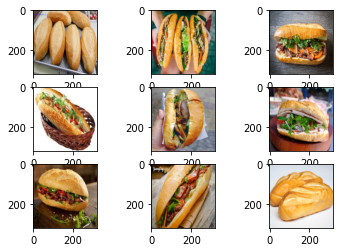

In [52]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder='/content/drive/MyDrive/Colab Notebooks/Mon_An_VN/Train/MonAn/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'banhmy.'+str(i)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

In [76]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder='/content/drive/MyDrive/Colab Notebooks/Mon_An_VN/Train/MonAn/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('banhchung'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('banhcanh'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    photos = asarray(photos)
  
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(2, 200, 200, 3) (2,)


In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
 history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
1/1 [==============================] - 1s 607ms/step - loss: 48.4337 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 188ms/step - loss: 197.8694 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 203ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 182ms/step - loss: 9.7151 - accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 175ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 175ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 174ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 188ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 175ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 168ms/step - loss: 0.0000e+00 - a

In [72]:
model.evaluate(photos,labels)

1/1 [==============================] - 0s 159ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [47]:
classes = ["banhcanh","banhchung","banhmy","banhtet","banhxeo","caolau","comchay","comga","nemcuon","nemran"]

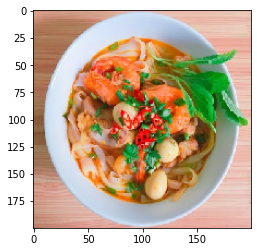

In [48]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('banhcanh.jpg', target_size=(200,200))
plt.imshow(img)

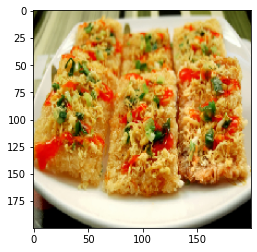

In [37]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('comchay.jpg', target_size=(200,200))
plt.imshow(img)

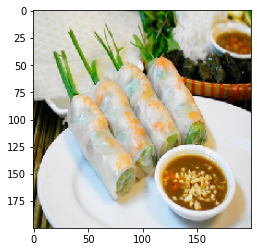

In [38]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('nemcuon.jpg', target_size=(200,200))
plt.imshow(img)